<a href="https://colab.research.google.com/github/conectarivan/Raintech/blob/main/AnaliseDados/.Dispositivo_x_INMET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de erro

Importando dados do INMET do dia 01/06/2022 até 09/06/2022.

In [186]:
import requests

url = "https://apitempo.inmet.gov.br/estacao/2022-06-01/2022-06-09/A201"
resultado = requests.get(url)
dados = resultado.json()

Filtrando os dados obtidos da plataforma e transformando em um DataFrame.

In [187]:
import pandas as pd
import json

dados_str = json.dumps(dados)
dados_tabela = pd.read_json(dados_str)

dados_filtrados = dados_tabela[["DT_MEDICAO","HR_MEDICAO","TEM_INS","UMD_INS"]]

dados_filtrados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS
0,2022-06-01,0,23.7,98
1,2022-06-01,100,23.9,98
2,2022-06-01,200,24.0,98
3,2022-06-01,300,23.8,98
4,2022-06-01,400,23.8,98
...,...,...,...,...
211,2022-06-09,1900,30.7,74
212,2022-06-09,2000,23.3,96
213,2022-06-09,2100,23.4,97
214,2022-06-09,2200,23.4,97


Importando os dados coletados pelo dispositivo da RainTech.

In [188]:
dadostb = pd.read_csv('dadosTB2.csv',sep=';')
dadostb

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS
0,01/06/2022,0,28.50,92.01
1,01/06/2022,100,28.44,92.27
2,01/06/2022,200,28.32,92.33
3,01/06/2022,300,28.22,92.38
4,01/06/2022,400,28.09,92.72
...,...,...,...,...
211,09/06/2022,1900,28.92,85.84
212,09/06/2022,2000,28.89,86.14
213,09/06/2022,2100,29.01,86.21
214,09/06/2022,2200,28.93,86.22


# Organizando os dados com os quais desejo trabalhar.

Separando temperatura e umidade de ambos os DataFrames (dados_filtrados e dadostb).

In [189]:
temp_inmet = dados_filtrados.TEM_INS
umid_inmet = dados_filtrados.UMD_INS
temp_tb = dadostb.TEM_INS
umid_tb = dadostb.UMD_INS

Após realizar a separação, uno esses conjuntos em um DataFrame, com o nome da coluna informando de onde cada variável foi retirada. Além disso, aproveito para já criar uma coluna cujo valor represente o cálculo do erro simples (previsão - real) de cada linha.

In [190]:
data = {"DT_MEDICAO": dados_filtrados.DT_MEDICAO, "HR_MEDICAO": dadostb.HR_MEDICAO, "TEM_TB": temp_tb, "TEM_INMET": temp_inmet, 'UMD_TB': umid_tb, 'UMD_INMET': umid_inmet, 'ERRO_TEM': (temp_tb - temp_inmet), 'ERRO_UMD': (umid_tb - umid_inmet)}
df = pd.concat(data, axis=1)
df

,DT_MEDICAO,HR_MEDICAO,TEM_TB,TEM_INMET,UMD_TB,UMD_INMET,ERRO_TEM,ERRO_UMD
0,2022-06-01,0,28.50,23.7,92.01,98,4.80,-5.99
1,2022-06-01,100,28.44,23.9,92.27,98,4.54,-5.73
2,2022-06-01,200,28.32,24.0,92.33,98,4.32,-5.67
3,2022-06-01,300,28.22,23.8,92.38,98,4.42,-5.62
4,2022-06-01,400,28.09,23.8,92.72,98,4.29,-5.28
...,...,...,...,...,...,...,...,...
211,2022-06-09,1900,28.92,30.7,85.84,74,-1.78,11.84
212,2022-06-09,2000,28.89,23.3,86.14,96,5.59,-9.86
213,2022-06-09,2100,29.01,23.4,86.21,97,5.61,-10.79
214,2022-06-09,2200,28.93,23.4,86.22,97,5.53,-10.78


Criando um indice do tipo data-hora e atribuindo ao DataFrame.

In [191]:
indice = pd.date_range('2022-01-06', periods = len(dadostb.TEM_INS), freq='1H')
indice

DatetimeIndex(['2022-01-06 00:00:00', '2022-01-06 01:00:00',
               '2022-01-06 02:00:00', '2022-01-06 03:00:00',
               '2022-01-06 04:00:00', '2022-01-06 05:00:00',
               '2022-01-06 06:00:00', '2022-01-06 07:00:00',
               '2022-01-06 08:00:00', '2022-01-06 09:00:00',
               ...
               '2022-01-14 14:00:00', '2022-01-14 15:00:00',
               '2022-01-14 16:00:00', '2022-01-14 17:00:00',
               '2022-01-14 18:00:00', '2022-01-14 19:00:00',
               '2022-01-14 20:00:00', '2022-01-14 21:00:00',
               '2022-01-14 22:00:00', '2022-01-14 23:00:00'],
              dtype='datetime64[ns]', length=216, freq='H')

In [192]:
df.set_index(indice, inplace=True)
df.head()

,DT_MEDICAO,HR_MEDICAO,TEM_TB,TEM_INMET,UMD_TB,UMD_INMET,ERRO_TEM,ERRO_UMD
2022-01-06 00:00:00,2022-06-01,0,28.50,23.7,92.01,98,4.80,-5.99
2022-01-06 01:00:00,2022-06-01,100,28.44,23.9,92.27,98,4.54,-5.73
2022-01-06 02:00:00,2022-06-01,200,28.32,24.0,92.33,98,4.32,-5.67
2022-01-06 03:00:00,2022-06-01,300,28.22,23.8,92.38,98,4.42,-5.62
2022-01-06 04:00:00,2022-06-01,400,28.09,23.8,92.72,98,4.29,-5.28


# Métrica de avaliação do erro médio


Primeiro farei uma breve comparação entre os resultados obtidos a partir dos modelos RMSE e MAE, para então posteriormente explicar o porquê de escolher o RMSE para este caso.

RMSE para temperatura e umidade do ar.

In [193]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error

rmse_temp = sqrt(mean_squared_error(df.TEM_TB, df.TEM_INMET))
rmse_umid = sqrt(mean_squared_error(df.UMD_TB, df.UMD_INMET))
print('RMSE da temperatura: %.3f' %rmse_temp + '\nRMSE da umidade: %.3f' %rmse_umid)

RMSE da temperatura: 3.704
RMSE da umidade: 9.926


MAE para temperatura e umidade do ar.

In [194]:
from sklearn.metrics import mean_absolute_error

mae_temp = mean_absolute_error(df.TEM_TB, df.TEM_INMET)
mae_umid = mean_absolute_error(df.UMD_TB, df.UMD_INMET)
print('MAE da temperatura: %.3f' %mae_temp + '\nMAE da umidade: %.3f' %mae_umid)

MAE da temperatura: 3.269
MAE da umidade: 7.933


Se fosse para analisarmos somente a temperatura, provavelmente a escolheria seria pelo modelo MAE, isso porque os resultados de rmse_temp e mae_temp são bem próximos, porém como para a variável umidade o RMSE deu um valor significativamente maior que o MAE (mostrando que temos erros relativamente grandes) iremos trabalhar com o RMSE.

# Temperatura

Como vimos anteriormente o RMSE para temperatura é dado por:

In [195]:
rmse_temp = sqrt(mean_squared_error(df.TEM_TB, df.TEM_INMET))
print('RMSE da temperatura: %.3f' %rmse_temp)

RMSE da temperatura: 3.704


A análise das medidas descritivas pode ser realizada de forma global ou por dia, neste primeiro momento farei das duas formas, para demonstrar a sumarização dos dados e utilizar outros recursos como a função groupby().

Escolhendo a data de medição como conjunto de união, para verificar as medidas dos erros por dia.

In [197]:
df.groupby('DT_MEDICAO')
df.groupby('DT_MEDICAO').count()
df.groupby('DT_MEDICAO')['ERRO_TEM']

Aqui poderia ter escolhido utilizar as funções de forma direta como median para mediana, std para desvio padrão, max e min para máximo e mínimo respectivamente, porém optei por utilizar a função describe e obter todos em uma única tabela.

Pode-se notar que a tabela possui todas as métricas desejadas para avaliação, desde o mínimo e máximo, até mediana, primeiro e terceiro quartíl, representandos pelas colunas 50%, 25% e 75% respectivamente 

In [199]:
df.groupby('DT_MEDICAO')['ERRO_TEM'].describe()

,count,mean,std,min,25%,50%,75%,max
DT_MEDICAO,,,,,,,,
2022-06-01,24.0,2.661250,2.371049,-1.42,0.5675,4.300,4.4450,4.99
2022-06-02,24.0,2.680417,2.233818,-2.35,1.2025,3.645,4.3500,4.67
2022-06-03,24.0,2.962083,2.442194,-1.92,2.3750,4.220,4.7075,5.08
2022-06-04,24.0,2.974583,2.210023,-2.95,2.1975,3.890,4.2800,5.99
2022-06-05,24.0,3.012917,2.686333,-1.97,0.8250,4.370,4.8850,5.27
2022-06-06,24.0,2.492083,2.576577,-2.02,-0.0425,3.945,4.3025,6.21
2022-06-07,24.0,3.152917,2.052444,-0.46,1.5850,3.940,4.5875,5.51
2022-06-08,24.0,2.877917,2.218244,-2.07,0.8150,4.060,4.5350,5.32
2022-06-09,24.0,3.015833,2.586508,-1.78,-0.0075,4.420,4.8700,5.61


Após obter mediana, desvio padrão, máximo, mínimo, primeiro e terceiro quartíl do erro, podemos concluir que o valor da previsão não fica muito distante do valor real. Por exemplo, se olharmos o desvio padrão, notamos que ele não dispara para muito acima do 0, indicando que é um conjunto mais homogêneo.

Também podemos obter as medidas descritivas de forma global.

In [116]:
print('Mediana: %.3f' %df.ERRO_TEM.median())
df.ERRO_TEM.describe()

Mediana: 4.145


count    216.0000
mean       2.8700
std        2.3476
min       -2.9500
25%        0.6800
50%        4.1450
75%        4.5700
max        6.2100
Name: ERRO_TEM, dtype: float64

Do gráfico Boxplot aplicado ao ERRO_TEM de forma global, podemos ver que a linha verde está bem próximo do valor 4, que é exatamente a mediada de valor 4.145 que calculamos.

[]

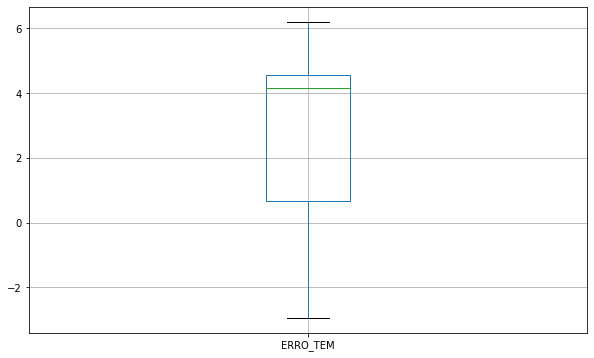

In [159]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column=['ERRO_TEM'])
boxplot.plot()

Histograma com a frequência dos erros. Podemos notar que os valores são bem concentrados, não temos valores tão distantes (outliers),conclusão também realizada quando encontramos o valor do rmse_temp.


<BarContainer object of 186 artists>

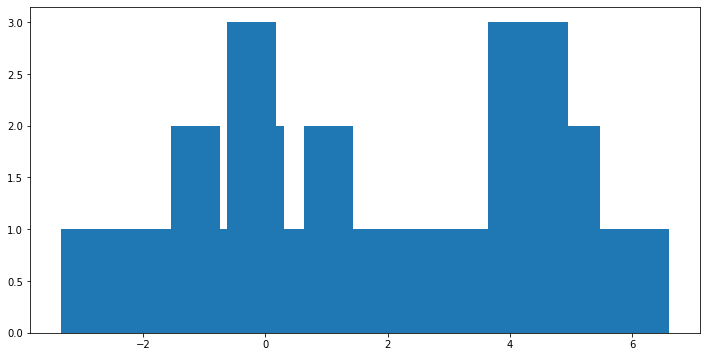

In [151]:
plt.figure(figsize=(12, 6))
erro_tem_freq = df.ERRO_TEM.value_counts()
plt.bar(erro_tem_freq.index, erro_tem_freq.values)

Do gráfico de dispersão (tempo vs erro) podemos notar os dias em que os erros de maior valor são mais incidentes, assim como pode-se verificar que o maior erro foi do dia 06/06/2022.

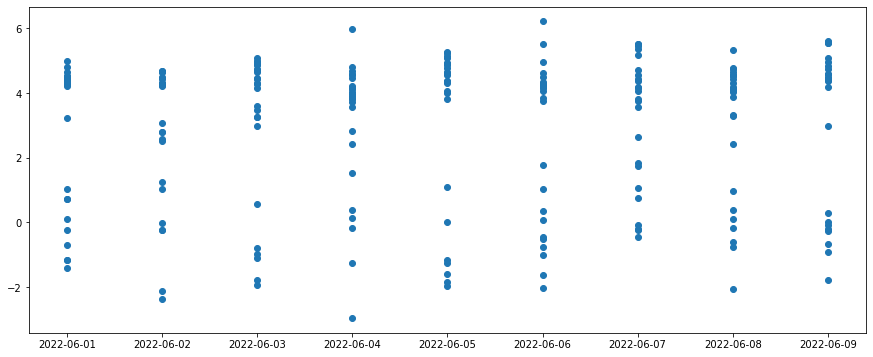

In [200]:
plt.figure(figsize=(15, 6))
#plt.axis('equal')
plt.scatter(df.DT_MEDICAO, df.ERRO_TEM)

# Umidade

Como analisamos anteriormente, o valor do RMSE da umidade é elevado, disso podemos concluir que há valores de captura do dispositivo significativamente distantes do real. Ao decorrer deste tópico só iremos confirmar esses valores elevados de erro.


In [201]:
rmse_umid = sqrt(mean_squared_error(df.UMD_TB, df.UMD_INMET))
print('RMSE da umidade: %.3f' %rmse_umid)

RMSE da umidade: 9.926


Assim como utilizei para avaliação das medidas descritivas de erro para temperatura, também usarei a função groupby para umidade.

In [202]:
df.groupby('DT_MEDICAO')
df.groupby('DT_MEDICAO').count()
df.groupby('DT_MEDICAO')['ERRO_UMD']

Diferente do desvio padrão de valor baixo notado no erro da temperatura, na umidade temos um desvio padrão elevado, o que nos faz concluir que o ERRO_UMD é uma série de valores discrepantes, apenas confirmando o que já haviamos analisado ao obter o RMSE de valor elevado.

In [204]:
df.groupby('DT_MEDICAO')['ERRO_UMD'].describe()

,count,mean,std,min,25%,50%,75%,max
DT_MEDICAO,,,,,,,,
2022-06-01,24.0,2.918333,9.627091,-5.99,-4.1225,-3.195,12.3725,18.82
2022-06-02,24.0,2.445000,8.649088,-4.56,-4.0000,-3.245,7.4600,24.48
2022-06-03,24.0,0.935000,10.183094,-9.55,-5.8750,-4.040,6.5925,21.63
2022-06-04,24.0,0.095417,7.452320,-10.27,-4.0475,-2.300,2.2950,16.84
2022-06-05,24.0,0.855000,10.967282,-9.86,-6.5550,-4.155,10.6725,22.32
2022-06-06,24.0,3.088750,10.896444,-9.32,-5.0000,-3.605,11.6000,26.31
2022-06-07,24.0,1.397083,9.587511,-8.29,-6.4400,-2.530,9.2625,21.86
2022-06-08,24.0,2.827917,11.339289,-8.52,-5.4675,-2.095,10.4125,33.11
2022-06-09,24.0,0.977500,10.042960,-10.79,-6.3625,-3.150,12.2725,18.18


Do Boxplot do erro da umidade é notável que o valor máximo global passa um pouco de 30, o tracejado verde é a mediana global, também lido como 50% do conjunto.

[]

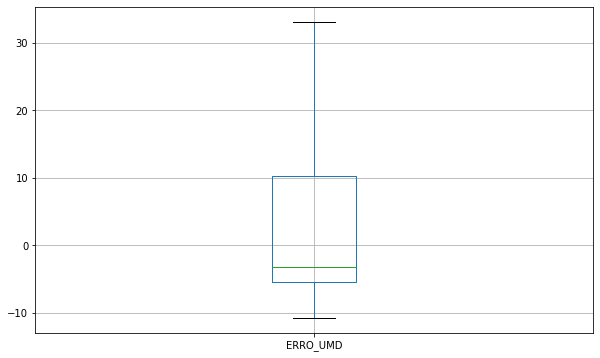

In [205]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column=['ERRO_UMD'])
boxplot.plot()

Do histograma de erros da umidade vemos que o valor de erro de maor incidência é algo entre 3 e 6 e que os demais valores de erro são bem distribuidos em termos de frequência, um exemplo são os valores entre 0 e 20 que possuem a mesma frequência.

<BarContainer object of 194 artists>

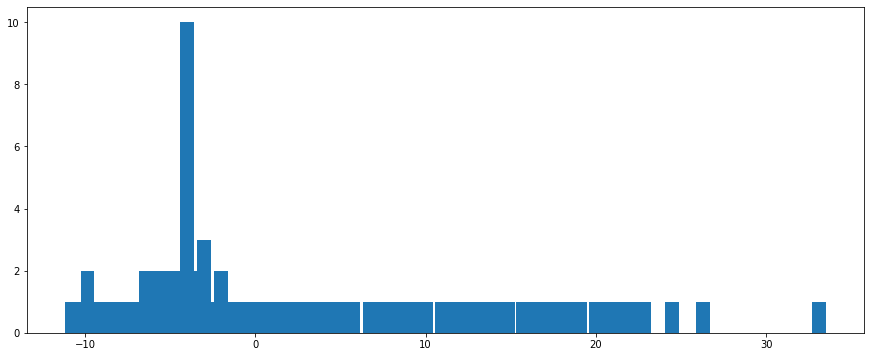

In [206]:
plt.figure(figsize=(15, 6))
erro_umid_freq = df.ERRO_UMD.value_counts()
plt.bar(erro_umid_freq.index, erro_umid_freq.values)

Do gráfico de dispersão (tempo vs erro) pode-se notar que o dia de maior valor de erro foi no dia 08/06/2022, também podemos ver que o dia 01/06/2022 só possui valores menor que zero e maior que 10.

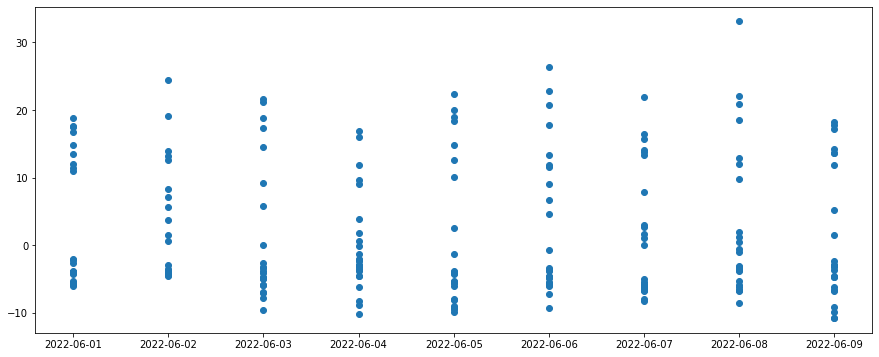

In [207]:
plt.figure(figsize=(15, 6))
#plt.axis('equal')
plt.scatter(df.DT_MEDICAO, df.ERRO_UMD)

# Conclusão

  O dispositivo no que diz respeito à temperatura nos mostrou dados muito próximos da realidade, isso porquê devemos levar em consideração o local em que o dispositivo estava localizado, a troca de calor com aparelhos e objetos que geram calor próximos e outras interferências. Todavía, quando avaliamos os dados de umidade, temos valores bem discrepantes dos fornecidos pelo INMET, isso se dá pelo fato da variação da umidade durante o dia ser muito maior e assim como no caso da temperatura, o local também interfere, e nesse caso o dispositivo estava próximo a um local de intensa geração de vapor.